[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)

### based on Fig. 1 from Stewart 1975 (J. Geophys. Res.) "_Stable Isotope FractionationDue to Evaporation and Isotopic Exchange of Falling Waterdrops: Applications to Atmospheric Processes and Evaporation of Lakes_" (https://doi.org/10.1029/JC080i009p01133)

In [35]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from PySDM import Formulae
from PySDM.physics import si, in_unit
from open_atmos_jupyter_utils import show_plot

from kinzer_gunn_tables import table2, table1

In [37]:
formulae = Formulae(
    ventilation='PruppacherAndRasmussen1979',
    diffusion_thermics='Neglect',
    air_dynamic_viscosity='ZografosEtAl1987',
    terminal_velocity='RogersYau',
)
const = formulae.constants
temperature=293.15 *si.K
radii = table1['Radius [cm]']*si.cm

pressure = const.p_STP
pvs = formulae.saturation_vapour_pressure.pvs_water(temperature)
v_term = formulae.terminal_velocity.v_term(radii)
eta_air=formulae.air_dynamic_viscosity.eta_air(temperature)
D=formulae.diffusion_thermics.D(T=temperature, p=pressure)
air_density =const.p_STP/const.Rd/temperature
Sc = formulae.trivia.air_schmidt_number(
    dynamic_viscosity=eta_air, 
    diffusivity=formulae.diffusion_thermics.D(T=temperature, p=const.p_STP), 
    density=air_density,
)
Re = formulae.particle_shape_and_density.reynolds_number(
     radius=radii,
     velocity_wrt_air=v_term,
     dynamic_viscosity=eta_air,
     density=air_density,
)
sqrt_re_times_cbrt_sc = formulae.trivia.sqrt_re_times_cbrt_sc(
        Re=Re,
        Sc=Sc
    )
r_dr_dt = formulae.drop_growth.r_dr_dt(
    RH_eq=1,
    T=temperature,
    RH=10,
    lv=0,
    pvs=pvs,
    D=D,
    K=44.,
    ventilation_factor=1
)

In [38]:
F = const.FROESSLING_1938_B * np.power(2 * np.pi, 1 / 2) / np.power(Sc, 1 / 6)

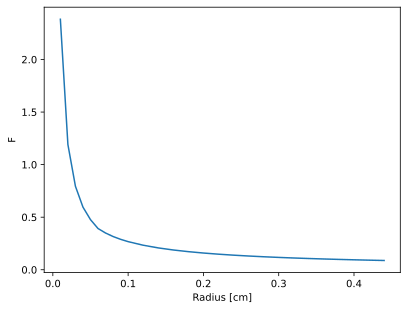

In [51]:
F_kinzer_gunn = (const.rho_w * r_dr_dt / table2['20'][1]*10**6- 1)/0.22/np.sqrt(Re)
plt.plot(in_unit(radii, si.cm), F_kinzer_gunn)
plt.xlabel('Radius [cm]')
plt.ylabel('F')
show_plot("F_of_radius")